In [50]:
import numpy as np
import csv

# to add files
from google.colab import files

# the object "uploaded_dict" is a dictionary of all files uploaded, keyed by filename
uploaded_dict = files.upload()

for fn in uploaded_dict.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded_dict[fn])))
  

Saving UAExtendedData.csv to UAExtendedData (8).csv
User uploaded file "UAExtendedData.csv" with length 353767 bytes


In [51]:
for key, val in uploaded_dict.items():
  print(key)
  print(val)

f = open('UAExtendedData.csv', "rt", encoding='ascii')


  


UAExtendedData.csv
b'32.2337934,-110.9547958,3\r\n32.2303972,-110.9567222,3\r\n32.2290578,-110.9594937,3\r\n32.2396061,-110.9497596,3\r\n32.2326679,-110.954738,3\r\n32.2278581,-110.9437983,6\r\n32.2335467,-110.9466309,3\r\n32.2338271,-110.9523318,3\r\n32.2348496,-110.9494037,3\r\n32.2515301,-110.9291951,6\r\n32.2316597,-110.9625473,6\r\n32.2300582,-110.9532406,3\r\n32.2290737,-110.9594785,3\r\n32.2290578,-110.9594785,3\r\n32.234568,-110.9478472,3\r\n32.2286339,-110.9529183,6\r\n32.2304092,-110.9594033,3\r\n32.234878,-110.9452476,6\r\n32.227765,-110.9579086,6\r\n32.2303718,-110.9578983,1\r\n32.2317166,-110.9488632,3\r\n32.2337718,-110.9494026,3\r\n32.2290578,-110.9594785,3\r\n32.234865,-110.9458568,6\r\n32.234878,-110.9452476,3\r\n32.2316756,-110.9625475,3\r\n32.2348654,-110.9494168,3\r\n32.2277491,-110.9578955,3\r\n32.2277878,-110.9510106,3\r\n32.2359419,-110.9567609,3\r\n32.2348748,-110.9467358,3\r\n32.2396402,-110.9482717,3\r\n32.227765,-110.9579086,3\r\n32.2290737,-110.9594785,3\r\n

In [52]:
col_index_max = 140
row_index_max = 97
grid = np.zeros((row_index_max,col_index_max))
list = [['31.65', '-109.62', '3'],['31.23', '-109.62', '4'],['31.76', '-109.22', '2'],['32', '-110', '1']]

corner_lat = 32.25
corner_long = -110.969
resolution_lat = .0003
resolution_long = .0003
max_weight = 130.0


csv_reader = csv.reader(f, delimiter=',')

print(csv_reader)

for row in csv_reader:
  
  r = np.int_(np.round(np.absolute((np.float32(row[0]) - corner_lat) / resolution_lat)))
  c = np.int_(np.round(np.absolute((np.float32(row[1]) - corner_long) / resolution_long)))
  # check for r and c greater than = 0 and less than = max index - 1
  # below adds the weight in a plus shape directly around the rounded 
  if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
    grid[r,c] += np.float32(row[2])
    if grid[r,c] > max_weight:
      grid[r,c] = max_weight
    # points up down left right of crime spot
    r += 1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r -= 1
    c += 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight  
    c -= 1
    r -=1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r += 1
    c -= 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
      
    # points diag
    r += 1
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    c += 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    c -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    
print(grid)


[[  0.           0.           0.         ...  66.66666667  50.
    0.        ]
 [  0.           0.           5.5        ... 100.          66.66666667
    0.        ]
 [  0.           1.5          9.33333333 ...  66.66666667  50.
    0.        ]
 ...
 [130.         130.         130.         ...   6.5          8.66666667
    6.5       ]
 [ 85.         125.66666667 130.         ...  10.66666667  14.5
    8.66666667]
 [100.         130.         120.33333333 ...   9.5         10.66666667
    6.5       ]]


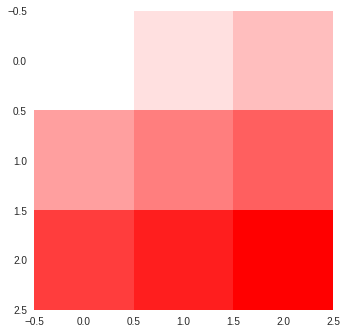

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(1, 1, 1), (1, 0, 0)]  
cmap_name = 'n'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)


d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
ax.grid(False)
im = ax.imshow(d, cmap=cm)




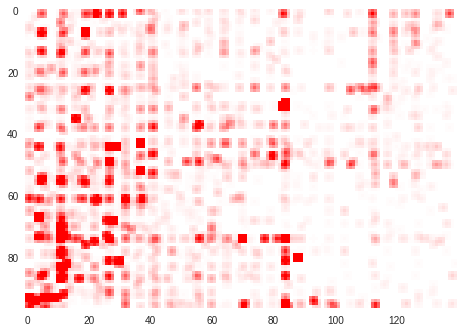

In [54]:
import matplotlib.pyplot as plt

d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
im = ax.imshow(grid, cmap = cm)

ax.grid(False)

plt.savefig("heatmap.png", dpi=500, quality = 95, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
files.download("heatmap.png")

In [16]:
import json

d = []

for i in range(len(grid)):
  for j in range(len(grid[0])):
    d += [[corner_lat - i*resolution_lat, corner_long + j*resolution_long, grid[i][j]]]

print(d)    

with open("uaextendeddata.json", "w") as outfile:
    json.dump({"data": d}, outfile, indent = 4)
    
files.download("uaextendeddata.json")

[[32.25, -110.969, 0.0], [32.25, -110.9687, 0.0], [32.25, -110.96839999999999, 0.0], [32.25, -110.96809999999999, 0.0], [32.25, -110.9678, 0.0], [32.25, -110.9675, 0.0], [32.25, -110.96719999999999, 0.0], [32.25, -110.9669, 0.0], [32.25, -110.9666, 0.0], [32.25, -110.96629999999999, 0.0], [32.25, -110.966, 0.0], [32.25, -110.9657, 0.0], [32.25, -110.96539999999999, 0.0], [32.25, -110.96509999999999, 0.0], [32.25, -110.9648, 0.0], [32.25, -110.9645, 0.0], [32.25, -110.96419999999999, 0.0], [32.25, -110.9639, 0.0], [32.25, -110.9636, 0.0], [32.25, -110.96329999999999, 0.0], [32.25, -110.963, 0.0], [32.25, -110.9627, 0.0], [32.25, -110.96239999999999, 0.0], [32.25, -110.96209999999999, 0.0], [32.25, -110.9618, 0.0], [32.25, -110.9615, 0.0], [32.25, -110.96119999999999, 0.0], [32.25, -110.9609, 0.0], [32.25, -110.9606, 0.0], [32.25, -110.96029999999999, 0.0], [32.25, -110.96, 0.0], [32.25, -110.9597, 0.0], [32.25, -110.95939999999999, 0.0], [32.25, -110.95909999999999, 0.0], [32.25, -110.9